<a href="https://colab.research.google.com/github/tomhyhan/noodles/blob/main/pasta_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import userdata
from google.colab import auth

auth.authenticate_user()
token = userdata.get('token')
username = userdata.get('username')
repo_name = "noodles"

In [3]:
import os

!git clone https://github.com/tomhyhan/{repo_name}.git

if os.getcwd() != f"/content/{repo_name}":
    %cd {repo_name}
!git pull
!pwd


fatal: destination path 'noodles' already exists and is not an empty directory.
/content/noodles
From https://github.com/tomhyhan/noodles
   28548a9..db3326d  main       -> origin/main
Already up to date.
/content/noodles


In [4]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
import sys

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = "noodles"

GOOGLE_DRIVE_PATH = os.path.join("..", "drive", "My Drive", GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)


In [6]:

from model.utils import test_colab
test_colab()


Hello Colab! from Noodles ha


In [7]:
!pip install torchinfo
!pip install imagehash

In [8]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold


from config.config_manager import ConfigManager
from collections import Counter
from model.data_model import PastaData, create_train_transforms, create_test_transforms
from model.train import trainer, create_model
from model.utils import reset_seed, save_model
from model.data import CLASS_ENCODER, create_csv
from model.viz import class_imbalance, draw_loss, draw_train_val_accuracy

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [9]:
config_manager = ConfigManager("./config/config.yml")

SEED = config_manager.config.seed

In [10]:
reset_seed(SEED)

In [11]:
image_path = os.path.join(GOOGLE_DRIVE_PATH, "images")
csv_file_path = os.path.join(GOOGLE_DRIVE_PATH, "pasta_data.csv")

if not os.path.exists(csv_file_path):
    create_csv(image_path, csv_file_path)

In [12]:
data = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, "./pasta_data.csv"))
image_paths, labels = data["img_path"], data["label"]

X, test_data, y, test_label = train_test_split(image_paths.values, labels.values, train_size=0.9, random_state=SEED, shuffle=True, stratify=labels)

5032 1259
=== ../drive/My Drive/noodles/./maxvit/maxvit_k_fold_0.pt exist! ===
Resume Training from previous check point


/content/noodles/model/utils.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(out_file, map_location="cpu")


Epoch 8/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.936476396968407e-05]
Epoch 8 Loss: 1.3531792823473612 Train Accuracy: 0.9234             Validation Accuracy: 0.855
Global gradient norm: 2.6126420036131734


Epoch 9/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.57666351956958e-05]
Epoch 9 Loss: 1.3487688358624776 Train Accuracy: 0.9446             Validation Accuracy: 0.86
Global gradient norm: 2.9581237432032483


Epoch 10/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [2.8866422562400154e-09]
Epoch 10 Loss: 1.3129037316640217 Train Accuracy: 0.9506             Validation Accuracy: 0.8658333333333333
Global gradient norm: 2.905548164952883
End of Training for maxvit Model 0-fold
best accuracy: 0.8658333333333333


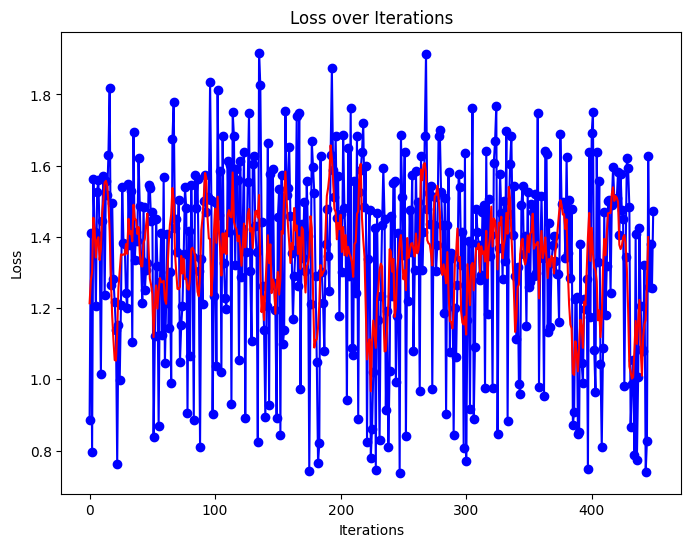

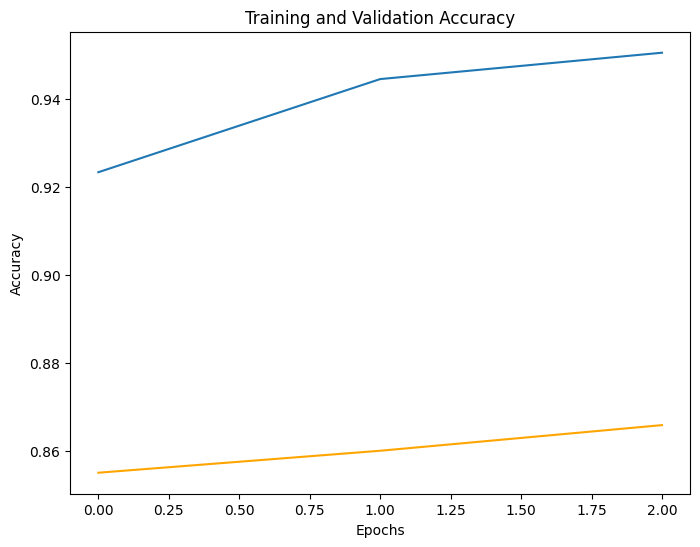

5033 1258
=== ../drive/My Drive/noodles/./maxvit/maxvit_k_fold_1.pt exist! ===
Resume Training from previous check point


Epoch 8/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.936476396968407e-05]
Epoch 8 Loss: 1.3268982076644897 Train Accuracy: 0.9198             Validation Accuracy: 0.8591666666666666
Global gradient norm: 2.0607931805281785


Epoch 9/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.57666351956958e-05]
Epoch 9 Loss: 1.3120100402832031 Train Accuracy: 0.933             Validation Accuracy: 0.8566666666666667
Global gradient norm: 1.684931166364304


Epoch 10/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [2.8866422562400154e-09]
Epoch 10 Loss: 1.269853491783142 Train Accuracy: 0.9492             Validation Accuracy: 0.8691666666666666
Global gradient norm: 3.2372844551928117
End of Training for maxvit Model 1-fold
best accuracy: 0.8691666666666666


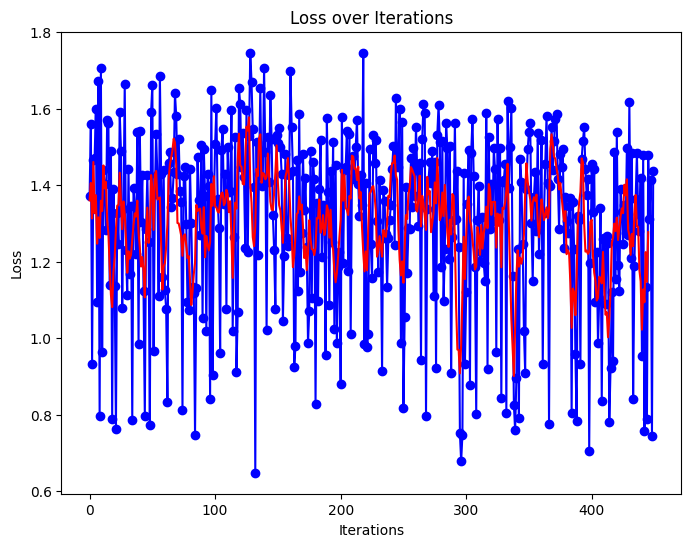

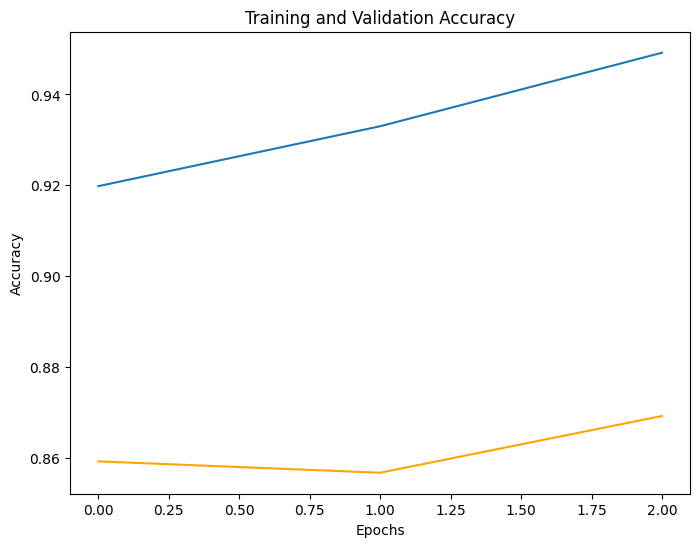

5033 1258
=== ../drive/My Drive/noodles/./maxvit/maxvit_k_fold_2.pt exist! ===
Resume Training from previous check point


Epoch 8/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.936476396968407e-05]
Epoch 8 Loss: 1.3473462041219075 Train Accuracy: 0.933             Validation Accuracy: 0.8483333333333334
Global gradient norm: 2.5983987380205047


Epoch 9/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.57666351956958e-05]
Epoch 9 Loss: 1.4088726635773976 Train Accuracy: 0.9392             Validation Accuracy: 0.8491666666666666
Global gradient norm: 2.3836631414098446


Epoch 10/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [2.8866422562400154e-09]
Epoch 10 Loss: 1.3214822538693747 Train Accuracy: 0.951             Validation Accuracy: 0.8666666666666667
Global gradient norm: 1.7271832282034292
End of Training for maxvit Model 2-fold
best accuracy: 0.8666666666666667


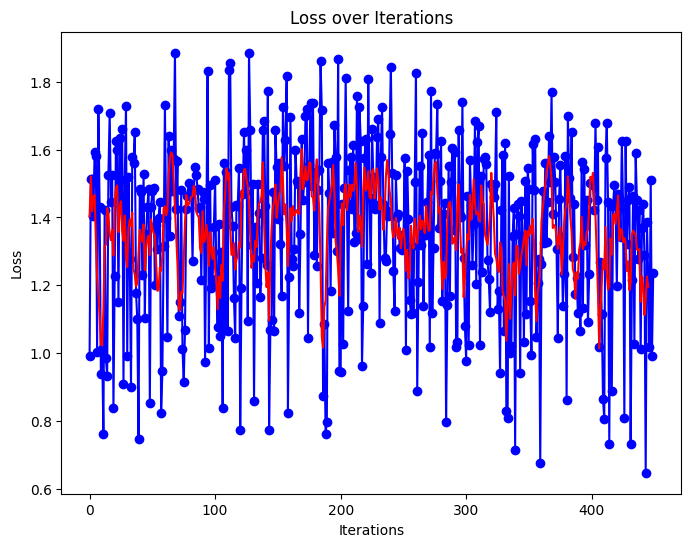

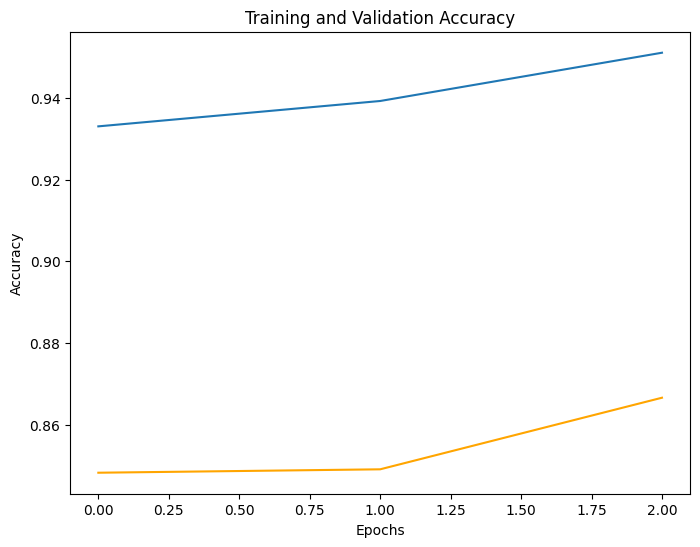

5033 1258
=== ../drive/My Drive/noodles/./maxvit/maxvit_k_fold_3.pt exist! ===
Resume Training from previous check point


Epoch 11/13:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.936476396968407e-05]
Epoch 11 Loss: 1.366355868577957 Train Accuracy: 0.9424             Validation Accuracy: 0.8341666666666666
Global gradient norm: 3.541989306645084


Epoch 12/13:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.57666351956958e-05]
Epoch 12 Loss: 1.2755225984255474 Train Accuracy: 0.954             Validation Accuracy: 0.8333333333333334
Global gradient norm: 2.3938689870452206


Epoch 13/13:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [2.8866422562400154e-09]
Epoch 13 Loss: 1.2611185411612194 Train Accuracy: 0.968             Validation Accuracy: 0.8616666666666667
Global gradient norm: 2.927114732106747
End of Training for maxvit Model 3-fold
best accuracy: 0.8616666666666667


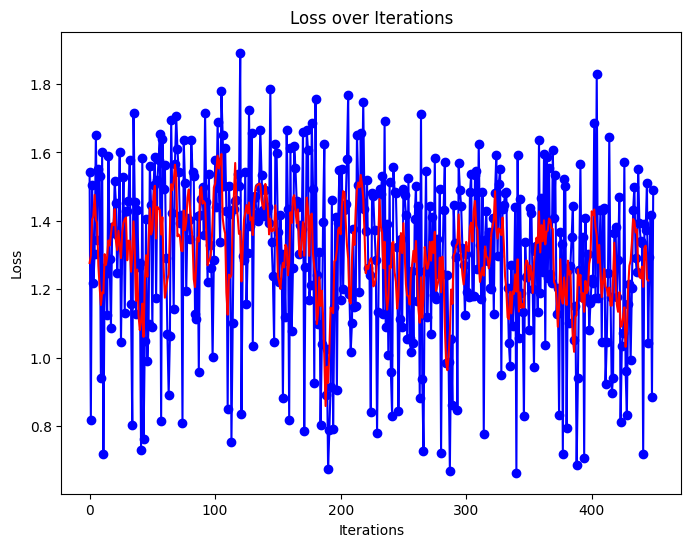

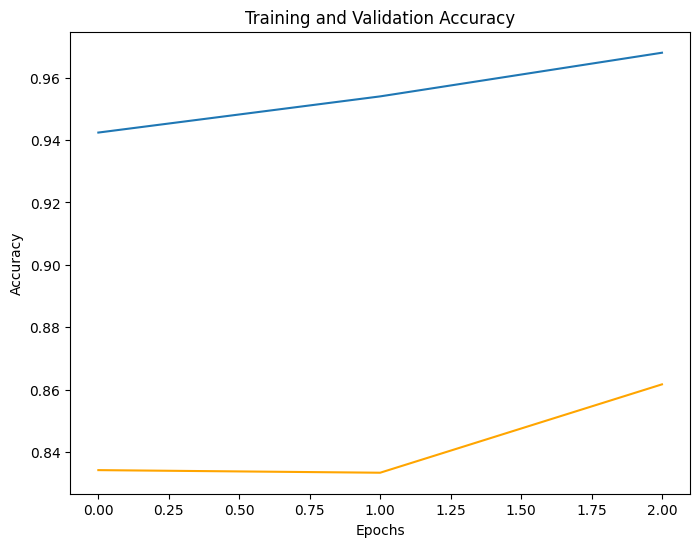

5033 1258
=== ../drive/My Drive/noodles/./maxvit/maxvit_k_fold_4.pt exist! ===
Resume Training from previous check point


Epoch 11/13:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.936476396968407e-05]
Epoch 11 Loss: 1.3297811190287272 Train Accuracy: 0.9344             Validation Accuracy: 0.8358333333333333
Global gradient norm: 1.7829410957008596


Epoch 12/13:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.57666351956958e-05]
Epoch 12 Loss: 1.3336770526568096 Train Accuracy: 0.9506             Validation Accuracy: 0.85
Global gradient norm: 2.3586887771554013


Epoch 13/13:   0%|          | 0/150 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [18]:
k_fold = StratifiedKFold(n_splits=5, random_state=SEED, shuffle=True)
models = ['regnet']

# N=100
# perm_indices = np.random.permutation(N)
# X = X[perm_indices]
# y = y[perm_indices]

for model_name in models:
    current_model_accuracies = []
    for k_id, (train_i, val_i) in enumerate(k_fold.split(X,y)):
        print(len(train_i), len(val_i))
        train_set = X[train_i]
        train_label_set = y[train_i]

        val_set = X[val_i]
        val_label_set = y[val_i]

        model_config = config_manager.config[model_name]
        lr = config_manager.config.lr
        num_epochs = config_manager.config.num_epochs
        num_classes = config_manager.config.num_classes

        device = 'cuda' if torch.cuda.is_available() else 'cpu'

        train_transform = create_train_transforms()
        test_transform = create_test_transforms()

        train_data = PastaData(train_set, train_label_set, transform_list=train_transform)
        train_data_accuracy = PastaData(train_set, train_label_set, transform_list=test_transform)
        val_data = PastaData(val_set, val_label_set, transform_list=test_transform)

        train_loader = DataLoader(train_data, batch_size=model_config.batch_size, shuffle=False, drop_last=True)
        train_loader_accuracy = DataLoader(train_data_accuracy, batch_size=model_config.batch_size, shuffle=False, drop_last=True)
        val_loader = DataLoader(val_data, batch_size=model_config.batch_size, shuffle=False, drop_last=True)

        model = create_model(model_name, num_classes)
        model.to(device)

        result_dir = os.path.join(GOOGLE_DRIVE_PATH, model_config.output_dir)
        os.makedirs(result_dir, exist_ok=True)

        out_file = os.path.join(result_dir, f"{model_name}_k_fold_{k_id}.pt")

        resume = False
        if os.path.exists(out_file):
            print(f"=== {out_file} exist! ===")
            resume = True

        #  need to make dataframe from images
        loss_history, train_accuracy_history, \
        val_accuracy_history, best_accuracy, model, optimizer, scaler, end_epoch = trainer(
            model,
            train_loader,
            train_loader_accuracy,
            val_loader,
            num_epochs=num_epochs,
            lr=lr,
            model_config=model_config,
            device=device,
            resume=resume,
            out_file=out_file,
            num_classes=num_classes
        )


        current_model_accuracies.append(best_accuracy)
        print(f"End of Training for {model_name} Model {k_id}-fold")
        print(f"best accuracy: {best_accuracy}")

        save_model(model, optimizer, scaler, end_epoch, out_file, best_accuracy)
        # torch.save(best_params, os.path.join(result_dir, f"{model_name}_k_fold_{k_id}.pt"))
        draw_loss(loss_history)
        draw_train_val_accuracy(train_accuracy_history, val_accuracy_history)

    print("current_model_accuracies", current_model_accuracies)


        # avg_accuracy = torch.mean(fold_accuracies)
        # std_accuracy = torch.std(fold_accuracies)

        # general plan
        # 1. save best accuracies
        # 2. compare with different models
        # 3. train on full dataset with best performing model
        # 4. make inference


In [19]:
from pathlib import Path
import glob

In [22]:
models = ['maxvit']
for model_name in models:
    model_config = config_manager.config[model_name]
    result_dir = os.path.join(GOOGLE_DRIVE_PATH, model_config.output_dir)
    output_dir = Path(result_dir)
    checkpt_paths =  glob.glob(os.path.join(output_dir, f"{model_name}_k_fold_*.pt"))
    accuracy_list = []
    epochs = []
    for checkpt_path in checkpt_paths:
        checkpoint = torch.load(checkpt_path, map_location='cpu')
        accuracy_list.append(checkpoint["best_accuracy"])
        epochs.append(checkpoint["epoch"] + 1)
    print("Model: ", model_name)
    print("epochs: ", epochs)
    print("Accuracy list: ",  accuracy_list)
    print("Accuracy Mean: ", np.mean(accuracy_list))
    print("Accuracy std: ", np.std(accuracy_list))

<ipython-input-22-3cd0ecfd348b>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpt_path, map_location='cpu')


Model:  maxvit
epochs:  [10, 10, 10, 13, 10]
Accuracy list:  [0.8658333333333333, 0.8691666666666666, 0.8666666666666667, 0.8616666666666667, 0.8575]
Accuracy Mean:  0.8641666666666667
Accuracy std:  0.004116363011742805


In [16]:
# Inference

In [17]:
!git pull
!git config --global user.email "tomhyhan@gmail.com"
!git config --global user.name username
!git add .
!git status
!git commit -m "updated trainer"
!git push https://{token}@github.com/{username}/{repo_name}.git

Already up to date.
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date
